In [122]:
import pandas as pd 
import requests
import prophet
url = 'https://dashboard-api.tgju.org/v1/tv/history?symbol=PRICE_DOLLAR_RL&resolution=1D&from=1681492565&to=1712596765'

res = requests.get(url=url)
res_j = res.json()
res_j.pop('s')
res_j.pop('v')
df = pd.DataFrame.from_dict(res_j)
df['t'] = pd.to_datetime(df['t'],unit='s')
dfs = df[['t','c']].copy()
dfs.rename(columns={'t':'ds','c':'y'}, inplace= True)
dfs = dfs[dfs['ds'] >= '2017-01-01'].reset_index().drop(columns='index')


In [118]:
from prophet import Prophet

m = Prophet(daily_seasonality=False)
m.add_country_holidays(country_name='IR')
m.fit(dfs)
future = m.make_future_dataframe(periods=180)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


20:39:58 - cmdstanpy - INFO - Chain [1] start processing
20:39:59 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
2526,2024-09-29,651671.358660,597039.060006,713699.242574
2527,2024-09-30,651919.230109,597399.652815,711823.304191
2528,2024-10-01,651751.693734,593343.610037,716193.013395
2529,2024-10-02,651668.696063,591055.398919,716524.729148
2530,2024-10-03,646444.670003,586837.280412,709659.114302


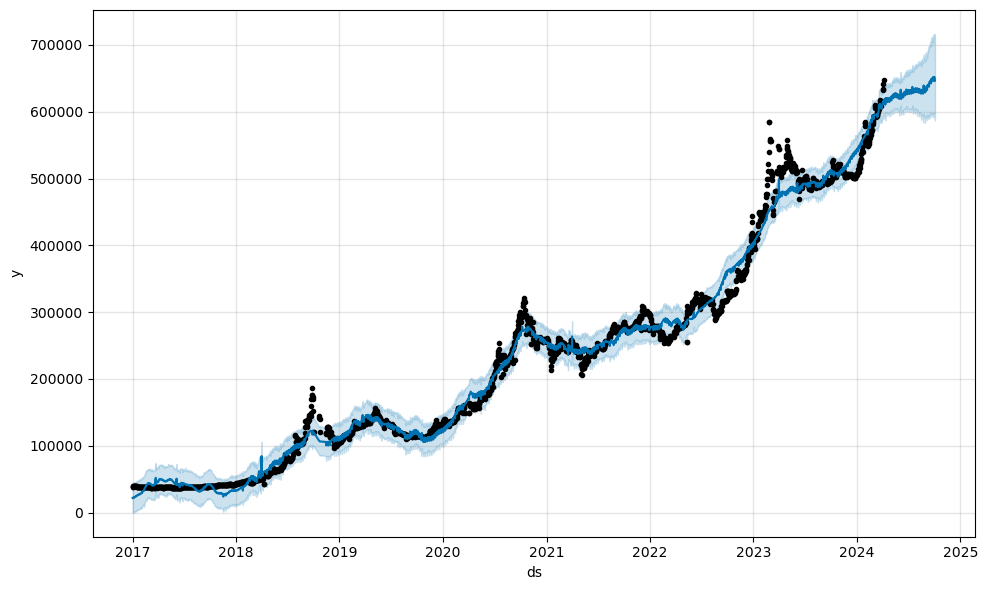

In [120]:
fig1 = m.plot(forecast)

/Users/behnamebrahimi/miniconda3/envs/env-ML/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/behnamebrahimi/miniconda3/envs/env-ML/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/behnamebrahimi/miniconda3/envs/env-ML/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series c

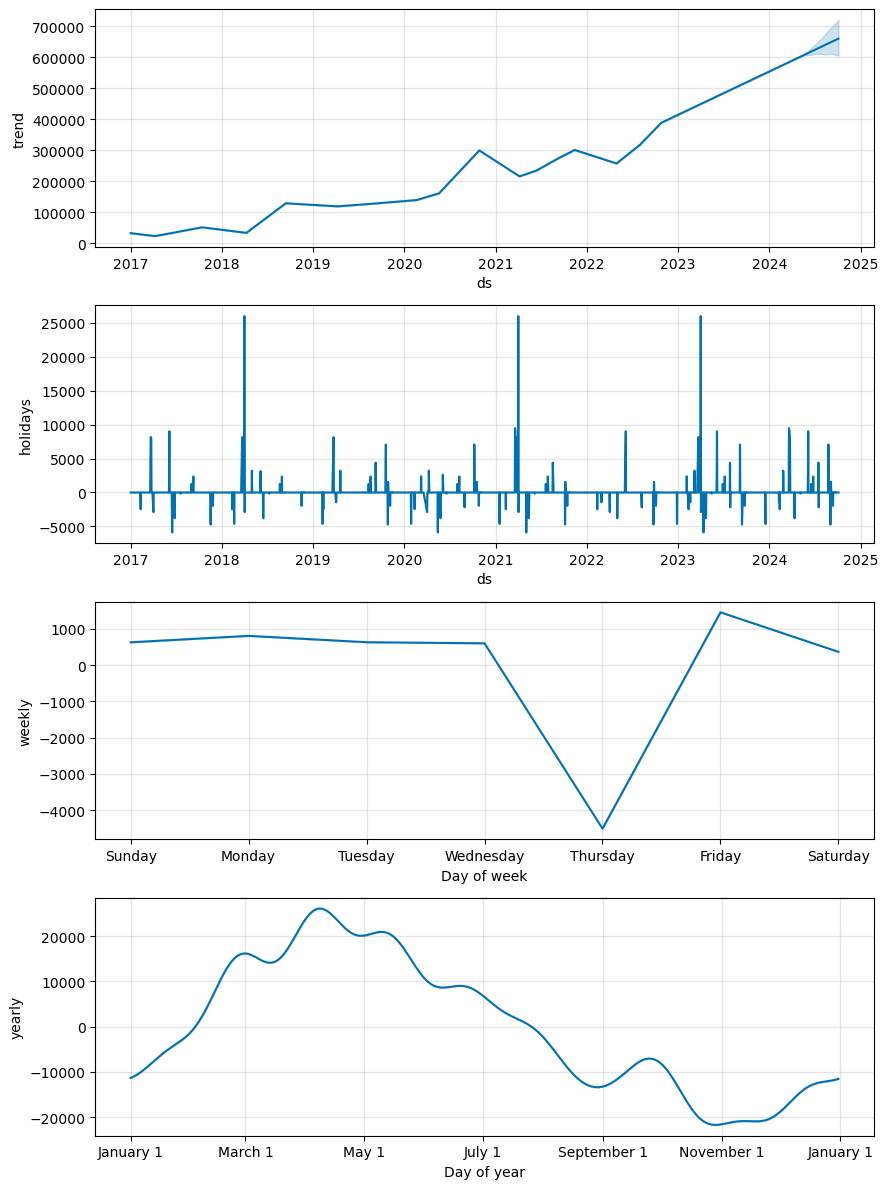

In [121]:
fig2 = m.plot_components(forecast)